In [1]:
import numpy as np
import pandas as pd
from ste import STE
import matplotlib.pyplot as plt

In [2]:
# Set default setting for the figures.
plt.style.use("default") 
plt.rc("axes", labelsize = 12) 
plt.rc("axes", titlesize = 15) 
plt.rc("xtick", labelsize = 12) 
plt.rc("ytick", labelsize = 12) 
plt.rc("legend", fontsize = 12) 

# Transfer entropy

Let $\hat{x}_i$ and $\hat{y}_i$, $i = 1, ..., N$, denote sequences of observations from systems $\hat{X}$ and $\hat{Y}$ (symbolized time-series).

$$T_{XY} = \sum p(\hat{y}_{i + \delta}, \hat{y}_{i}, \hat{x}_{i}) log_2\Big(\frac{p(\hat{y}_{i + \delta}, \hat{y}_{i}, \hat{x}_{i}) p(\hat{y}_i)}{p(\hat{y}_i, \hat{x}_i) p(\hat{y}_{i + \delta}, \hat{y}_{i})}\Big)$$

In short: 

Transfer Entropy =

$$ $$+ information about future observation Y(t + $\delta$) gained from past joint observations of Y and X
$$ $$− information about future observation Y(t + $\delta$)
gained from past observations of Y only
$$ $$= information flow from X to Y.

We can define the information entropy that is transferred from $\hat{X}$ to $\hat{Y}$ at some later points in time can be defined as:

$$T_{XY} = T_{XY}^{\delta'}, \ \ \delta' = \underset{\delta}{\mathrm{argmax}} \  T_{XY}^{\delta}$$

Effective transfer entropy:

$$ET_{XY} = T_{XY} - T_{X_{shuffle}Y}$$

Relative explanation added:

$$REA = \frac{ET_{XY}}{H(\hat{y}_{i + \delta}|\hat{y}_{i})}$$

# Example 

Let's define a time-series $Y$ with a fixed time dependency from another time-series $X$:

$$ y(t) = x(t-1)^2 \cdot 0.8 + v_{t} $$

where $x(t) ∼ N(0, 1)$, $v_{t} ∼ N(0, 0.1)$.

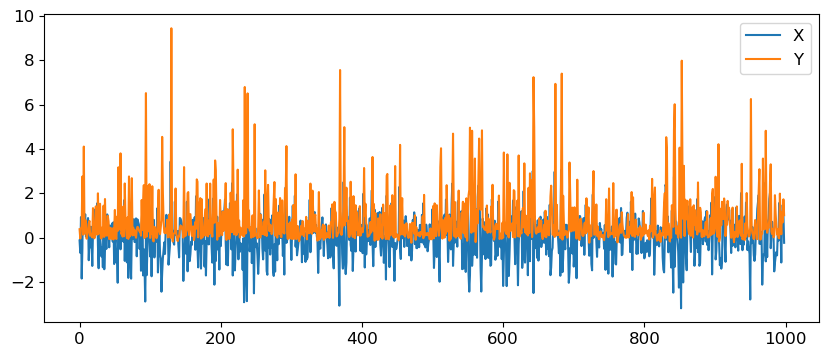

In [3]:
np.random.seed(40)

# Define length of the time-series.
size = 1000
# Define time-series X.
X = pd.Series(np.random.normal(0, 1, size = size), name = "X")
# Define time-series Y to fill.
Y = pd.Series(np.full([size], np.nan), name = "Y")

# Fill time-series Y based on the dependency with the time-series X.
for t in range(len(X)):
    try:
        Y.loc[t] = (X.loc[t-1]**2)*0.8 + np.random.normal(0, 0.1)
    except:
        pass

system = pd.concat([X, Y], axis = 1).dropna()

X = system["X"].values
Y = system["Y"].values

# Plot time-series.
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(X, label = "X")
ax.plot(Y, label = "Y")
ax.legend();

In [4]:
# Find the max delta.
deltas = list()
for delta in range(15):
    ste_delta = STE.calc_ste(X, Y, m = 3, h = delta+1) 
    deltas.append(ste_delta)        

deltas = pd.Series(deltas) 
deltas.index = deltas.index + 1

max_delta = deltas.idxmax()
max_delta

1

In [5]:
# Compute real value of STE from X to Y.
true_STE = STE.calc_ste(X, Y, m = 3, h = max_delta)
print(f"STE from X to Y: {round(true_STE, 4)}")

# Compute value of STE from X (shuffled 50 times) to Y.
shuffle_STE = list()
for i in range(50):
    X_shuffle = X.copy()
    np.random.shuffle(X_shuffle)
    shuffle_STE.append(STE.calc_ste(X_shuffle, Y, m = 3, h = max_delta))  
shuffle_STE = np.mean(shuffle_STE)
print(f"STE from X (shuffled 50 times) to Y: {round(shuffle_STE, 4)}")

eff_STE = true_STE - shuffle_STE
print(f"Effective STE: {round(eff_STE, 4)}")

print(f"Relative explanation added: {round(((eff_STE) / STE.entropy_rate(Y, m = 3, h = max_delta))*100, 2)} %")

STE from X to Y: 0.3314
STE from X (shuffled 50 times) to Y: 0.0448
Effective STE: 0.2866
Relative explanation added: 19.31 %


# Example

Let's define a time-series $Y$ with a fixed time dependency from another time-series $X$:

$$ y(t) = x(t-4)^2 \cdot 0.8 + v_{t} $$

where $x(t) ∼ N(0, 1)$, $v_{t} ∼ N(0, 0.1)$.

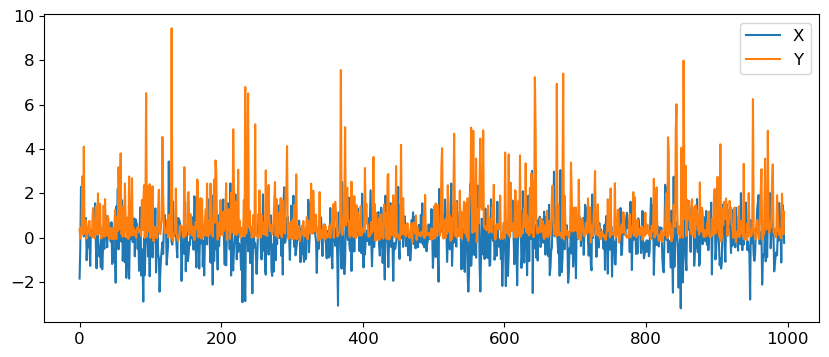

In [6]:
np.random.seed(40)

# Define length of the time-series.
size = 1000
# Define time-series X.
X = pd.Series(np.random.normal(0, 1, size = size), name = "X")
# Define time-series Y.
Y = pd.Series(np.full([size], np.nan), name = "Y")

# Create time-series Y based on the dependency with the time-series X.
for t in range(len(X)):
    try:
        Y.loc[t] = (X.loc[t-4]**2)*0.8 + np.random.normal(0, 0.1)
    except:
        pass

# Adjueste initial setting.
system = pd.concat([X, Y], axis = 1).dropna()

X = system["X"].values
Y = system["Y"].values

# Plot time-series.
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(X, label = "X")
ax.plot(Y, label = "Y")
ax.legend();

In [7]:
# Find the max delta.
deltas = list()
for delta in range(15):
    ste_delta = STE.calc_ste(X, Y, m = 3, h = delta+1) 
    deltas.append(ste_delta)        

deltas = pd.Series(deltas) 
deltas.index = deltas.index + 1

max_delta = deltas.idxmax()
max_delta

4

In [8]:
# Compute real value of STE from X to Y.
true_STE = STE.calc_ste(X, Y, m = 3, h = max_delta)
print(f"STE from X to Y: {round(true_STE, 4)}")

# Compute value of STE from X (shuffled 50 times) to Y.
shuffle_STE = list()
for i in range(50):
    X_shuffle = X.copy()
    np.random.shuffle(X_shuffle)
    shuffle_STE.append(STE.calc_ste(X_shuffle, Y, m = 3, h = max_delta))  
shuffle_STE = np.mean(shuffle_STE)
print(f"STE from X (shuffled 50 times) to Y: {round(shuffle_STE, 4)}")

eff_STE = true_STE - shuffle_STE
print(f"Effective STE: {round(eff_STE, 4)}")

print(f"Relative explanation added: {round(((eff_STE) / STE.entropy_rate(Y, m = 3, h = max_delta))*100, 2)} %")

STE from X to Y: 0.5168
STE from X (shuffled 50 times) to Y: 0.1177
Effective STE: 0.3992
Relative explanation added: 15.53 %


# Example

Let's define a time-series $Y$ with a fixed time dependency from another time-series $X$:

$$ y(t) = v_{t} $$

where $x(t) ∼ N(0, 1)$, $v_{t} ∼ N(0, 1)$.

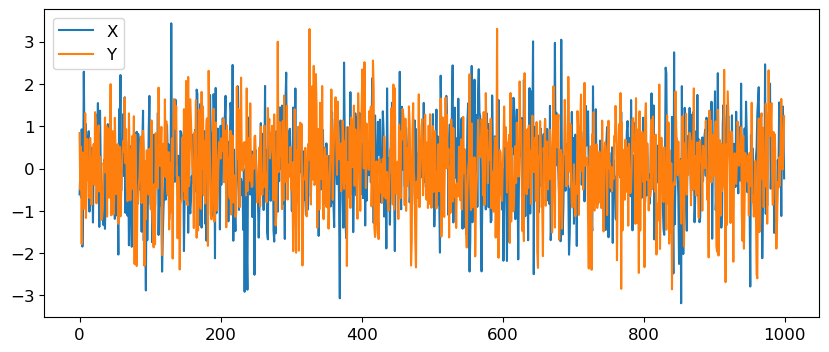

In [9]:
np.random.seed(40)

# Define length of the time-series.
size = 1000
# Define time-series X.
X = pd.Series(np.random.normal(0, 1, size = size), name = "X")
# Define time-series Y.
Y = pd.Series(np.full([size], np.nan), name = "Y")

# Create time-series Y based on the dependency with the time-series X.
for t in range(len(X)):
    try:
        Y.loc[t] = np.random.normal(0, 1)
    except:
        pass

# Adjueste initial setting.
system = pd.concat([X, Y], axis = 1).dropna()

X = system["X"].values
Y = system["Y"].values

# Plot time-series.
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(X, label = "X")
ax.plot(Y, label = "Y")
ax.legend();

In [10]:
# Find the max delta.
deltas = list()
for delta in range(15):
    ste_delta = STE.calc_ste(X, Y, m = 3, h = delta+1) 
    deltas.append(ste_delta)        

deltas = pd.Series(deltas) 
deltas.index = deltas.index + 1

max_delta = deltas.idxmax()
max_delta

14

In [11]:
# Compute real value of STE from X to Y.
true_STE = STE.calc_ste(X, Y, m = 3, h = 1, kx = 2)
print(f"STE from X to Y: {round(true_STE, 4)}")

# Compute value of STE from X (shuffled 50 times) to Y.
shuffle_STE = list()
for i in range(50):
    X_shuffle = X.copy()
    np.random.shuffle(X_shuffle)
    shuffle_STE.append(STE.calc_ste(X_shuffle, Y, m = 3, h = 1, kx = 2))  
shuffle_STE = np.mean(shuffle_STE)
print(f"STE from X (shuffled 50 times) to Y: {round(shuffle_STE, 4)}")

eff_STE = true_STE - shuffle_STE
print(f"Effective STE: {round(eff_STE, 4)}")

print(f"Relative explanation added: {round(((eff_STE) / STE.entropy_rate(Y, m = 3, h = max_delta))*100, 2)} %")

STE from X to Y: 0.1522
STE from X (shuffled 50 times) to Y: 0.1683
Effective STE: -0.0161
Relative explanation added: -0.63 %


# Example 

Let's define a time-series $Y$ with a fixed time dependency from another time-series $X$:

$$ y(t) = x(t-1) \cdot 0.8$$

where $x(t) ∼ N(0, 1)$.

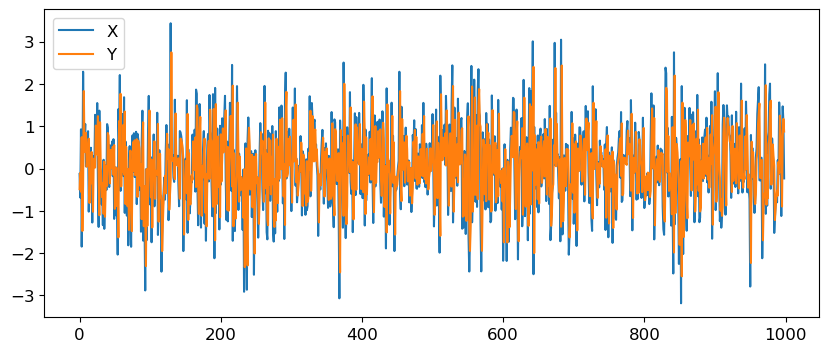

In [12]:
np.random.seed(40)

# Define length of the time-series.
size = 1000
# Define time-series X.
X = pd.Series(np.random.normal(0, 1, size = size), name = "X")
# Define time-series Y to fill.
Y = pd.Series(np.full([size], np.nan), name = "Y")

# Fill time-series Y based on the dependency with the time-series X.
for t in range(len(X)):
    try:
        Y.loc[t] = (X.loc[t-1])*0.8
    except:
        pass

system = pd.concat([X, Y], axis = 1).dropna()

X = system["X"].values
Y = system["Y"].values

# Plot time-series.
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(X, label = "X")
ax.plot(Y, label = "Y")
ax.legend();

In [13]:
# Find the max delta.
deltas = list()
for delta in range(15):
    ste_delta = STE.calc_ste(X, Y, m = 3, h = delta+1) 
    deltas.append(ste_delta)        

deltas = pd.Series(deltas) 
deltas.index = deltas.index + 1

max_delta = deltas.idxmax()
max_delta

1

In [14]:
# Compute real value of STE from X to Y.
true_STE = STE.calc_ste(X, Y, m = 3, h = 1, kx = 2)
print(f"STE from X to Y: {round(true_STE, 4)}")

# Compute value of STE from X (shuffled 50 times) to Y.
shuffle_STE = list()
for i in range(50):
    X_shuffle = X.copy()
    np.random.shuffle(X_shuffle)
    shuffle_STE.append(STE.calc_ste(X_shuffle, Y, m = 3, h = 1, kx = 2))  
shuffle_STE = np.mean(shuffle_STE)
print(f"STE from X (shuffled 50 times) to Y: {round(shuffle_STE, 4)}")

eff_STE = true_STE - shuffle_STE
print(f"Effective STE: {round(eff_STE, 4)}")

print(f"Relative explanation added: {round(((eff_STE) / STE.entropy_rate(Y, m = 3, h = max_delta))*100, 2)} %")

STE from X to Y: 1.4826
STE from X (shuffled 50 times) to Y: 0.1721
Effective STE: 1.3105
Relative explanation added: 88.36 %


# Example 

Let's define a time-series $Y$ with a fixed time dependency from another time-series $X$:

$$ y(t) = x(t-1)^2 \cdot 0.8 - e^{x(t-1)} + v_{t}$$

where $x(t) ∼ N(0, 1)$, $v_{t} ∼ N(0, 0.1)$.

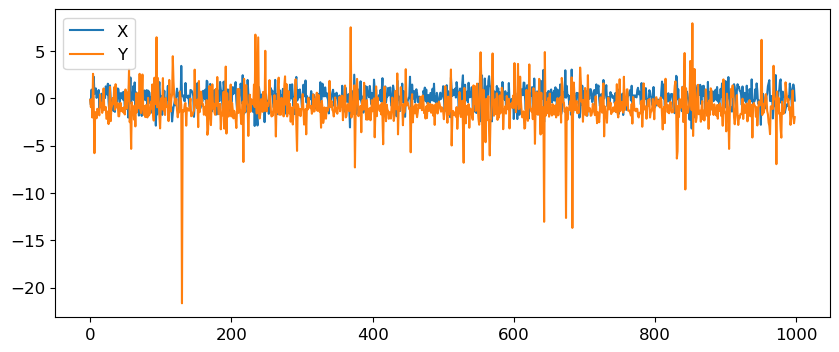

In [21]:
np.random.seed(40)

# Define length of the time-series.
size = 1000
# Define time-series X.
X = pd.Series(np.random.normal(0, 1, size = size), name = "X")
# Define time-series Y to fill.
Y = pd.Series(np.full([size], np.nan), name = "Y")

# Fill time-series Y based on the dependency with the time-series X.
for t in range(len(X)):
    try:
        Y.loc[t] = (X.loc[t-1]**2)*0.8 - np.exp(X.loc[t-1]) + np.random.normal(0, 0.1)
    except:
        pass

system = pd.concat([X, Y], axis = 1).dropna()

X = system["X"].values
Y = system["Y"].values

# Plot time-series.
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(X, label = "X")
ax.plot(Y, label = "Y")
ax.legend();

In [22]:
# Find the max delta.
deltas = list()
for delta in range(15):
    ste_delta = STE.calc_ste(X, Y, m = 3, h = delta+1) 
    deltas.append(ste_delta)        

deltas = pd.Series(deltas) 
deltas.index = deltas.index + 1

max_delta = deltas.idxmax()
max_delta

1

In [23]:
# Compute real value of STE from X to Y.
true_STE = STE.calc_ste(X, Y, m = 3, h = 1, kx = 2)
print(f"STE from X to Y: {round(true_STE, 4)}")

# Compute value of STE from X (shuffled 50 times) to Y.
shuffle_STE = list()
for i in range(50):
    X_shuffle = X.copy()
    np.random.shuffle(X_shuffle)
    shuffle_STE.append(STE.calc_ste(X_shuffle, Y, m = 3, h = 1, kx = 2))  
shuffle_STE = np.mean(shuffle_STE)
print(f"STE from X (shuffled 50 times) to Y: {round(shuffle_STE, 4)}")

eff_STE = true_STE - shuffle_STE
print(f"Effective STE: {round(eff_STE, 4)}")

print(f"Relative explanation added: {round(((eff_STE) / STE.entropy_rate(Y, m = 3, h = max_delta))*100, 2)} %")

STE from X to Y: 1.1924
STE from X (shuffled 50 times) to Y: 0.1707
Effective STE: 1.0217
Relative explanation added: 68.85 %
